# Evolutionary experiments
Code in this Jupyter notebook is used to simulate a passage experiment.  Results of these simulations are shown in Figure 6. 

In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import imp
import biofilm_functions as bio

## Main function

In [2]:
def passage_experiment(name='passage_experiment', concentration_gradient=[0,0,0], init_pla=0, init_bio=1000000, biofilm_benefit=0, biofilm_cost=0, AdRe=0):
    start = time.time()
    print ('starting')
    
    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=4
    mutation_rate=0.0000010
    cost_vector=[0.1,0.1,0.1,0.1]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,2,2,2] 

    if len(cost_vector)>1 and len(cost_vector)<loci:
        print ('cost vector length', len(cost_vector), 'does not match the number of loci', loci)
    if len(benefit_vector)>1 and len(benefit_vector)<loci:
        print ('benefit vector length does not match the number of loci')

    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=AdRe
    adhesion_rate=AdRe##0.00000001
    print ('adhesion', adhesion_rate, 'release', release_rate)

    MIC = 1.0
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 24 * 60  # length of a cycle in minutes
    init_conc = 2 * MIC  # intitial antibiotic concentration
    car_cap=10**9
    
    degradation_rate=-0.0006
    cycle_number=len(concentration_gradient)
 
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_pla  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic plankton:', my_pla_population.z_mic)
    
    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_bio
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic biofilm:', my_bio_population.z_mic)

    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate, dilution_factor_pla=0, dilution_factor_bio=0)

    #Run this 
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    #my_treatment.plot_results() 
    
    plt.semilogy(my_treatment.pla_population_record)
    plt.xlim(0,9*24*60)
    plt.title('plankton'+ name)
    plt.show()
    
    plt.semilogy(my_treatment.bio_population_record, ':')
    plt.xlim(0,9*24*60)
    plt.title('biofilm'+ name)
    #plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    plt.show()
    
    end = time.time()
    print ('finished in ', end - start)
    my_treatment.save_output(name)
    return (my_treatment.pla_population_record,my_treatment.pla_population_record, my_treatment.time, my_treatment.concentration_record)

## Running the simulations for specific parameters

In [12]:
imp.reload(bio)
R=10  # CHANGE THIS FOR MULTIPLE REPEATS

running simulation no: 0
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


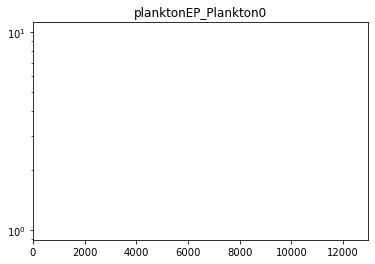

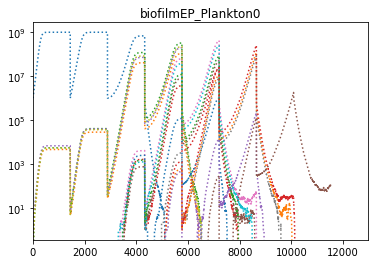

finished in  14.534197092056274
all saved as EP_Plankton0
running simulation no: 1
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


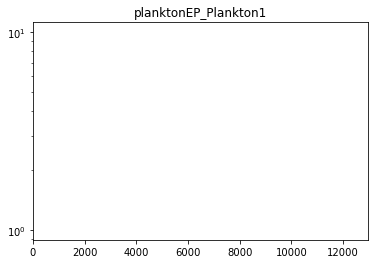

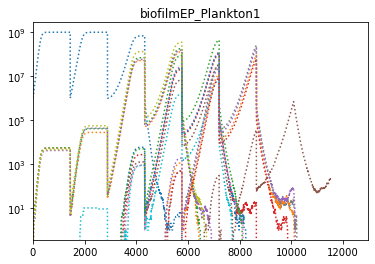

finished in  14.653141975402832
all saved as EP_Plankton1
running simulation no: 2
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


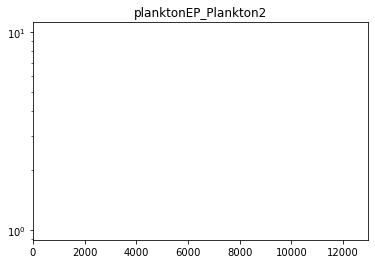

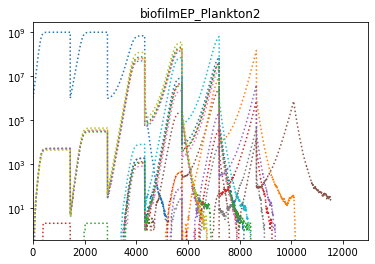

finished in  14.365252256393433
all saved as EP_Plankton2
running simulation no: 3
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
propensities are 0
propensities are 0


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


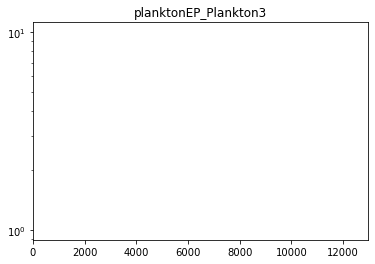

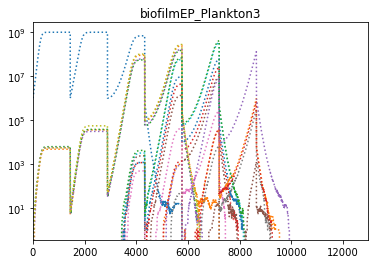

finished in  12.328069925308228
all saved as EP_Plankton3
running simulation no: 4
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


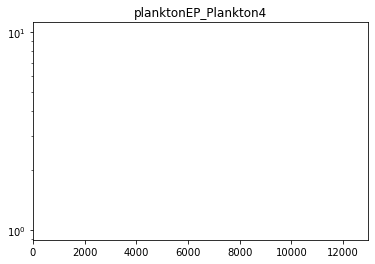

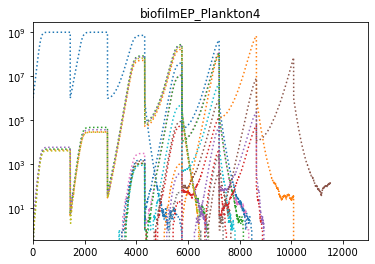

finished in  14.28541374206543
all saved as EP_Plankton4
running simulation no: 5
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


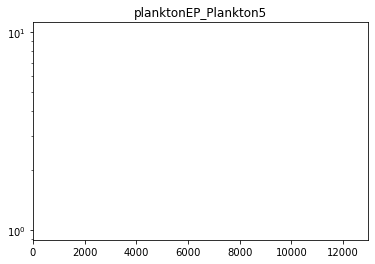

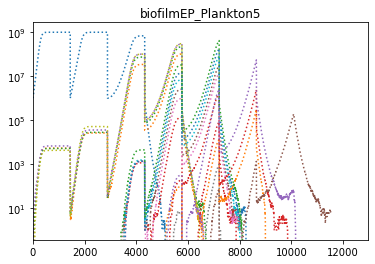

finished in  14.684421062469482
all saved as EP_Plankton5
running simulation no: 6
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
propensities are 0


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


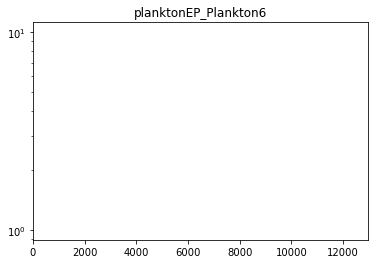

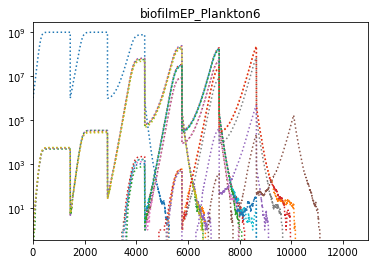

finished in  13.969245195388794
all saved as EP_Plankton6
running simulation no: 7
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


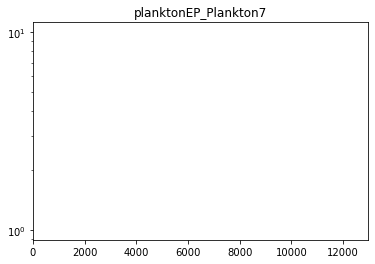

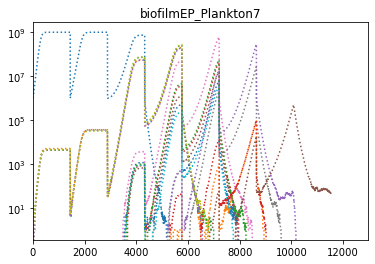

finished in  14.338860034942627
all saved as EP_Plankton7
running simulation no: 8
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
propensities are 0


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


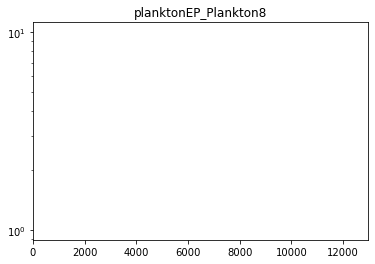

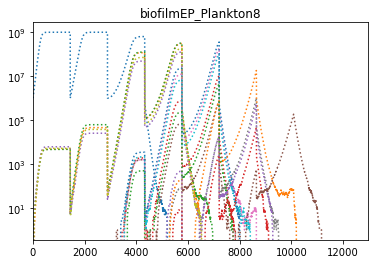

finished in  13.875196933746338
all saved as EP_Plankton8
running simulation no: 9
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


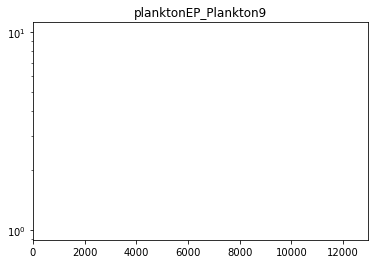

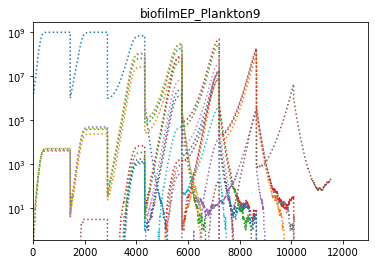

finished in  14.353735208511353
all saved as EP_Plankton9


In [13]:
biofilm_benefit=0 # CHANGE THIS FOR VARIOUS SCENARIOS
biofilm_cost=0    # CHANGE THIS FOR VARIOUS SCENARIOS
name='EP_Plankton' # CHANGE THIS FOR VARIOUS SCENARIOS

for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=passage_experiment(name=name+str(i), concentration_gradient=[0,0.5, 1, 2,4,8,16,32], biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

running simulation no: 0
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


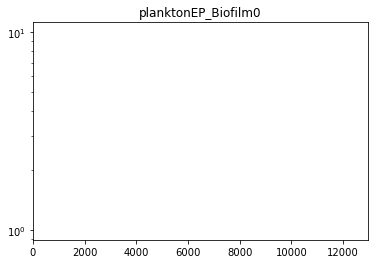

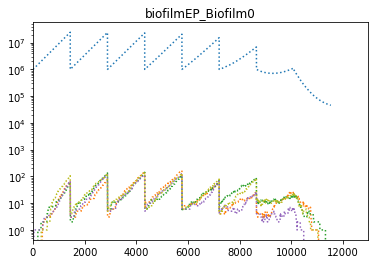

finished in  14.492959976196289
all saved as EP_Biofilm0
running simulation no: 1
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


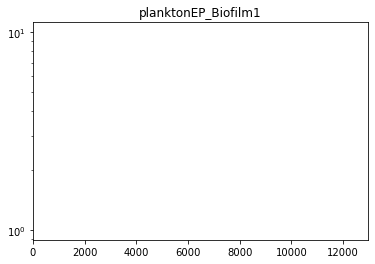

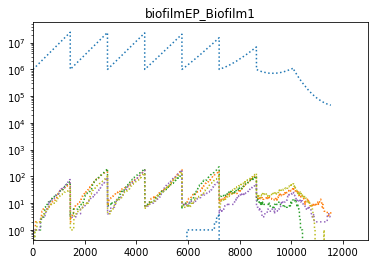

finished in  14.501418828964233
all saved as EP_Biofilm1
running simulation no: 2
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


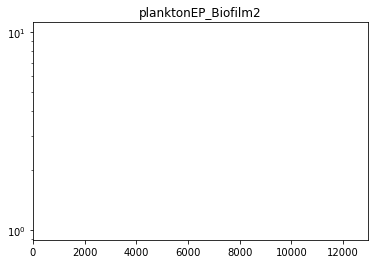

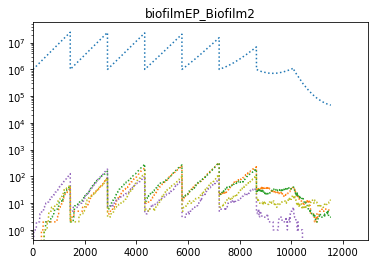

finished in  14.473613023757935
all saved as EP_Biofilm2
running simulation no: 3
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


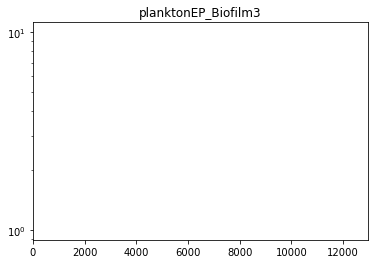

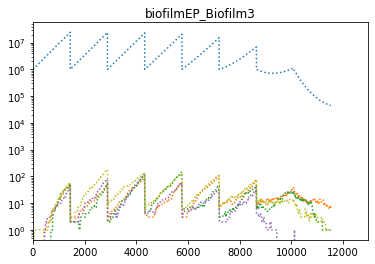

finished in  14.471475839614868
all saved as EP_Biofilm3
running simulation no: 4
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


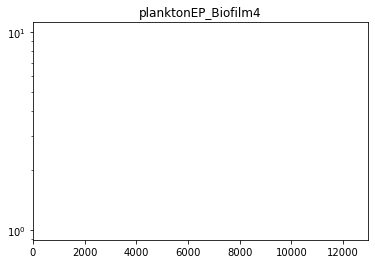

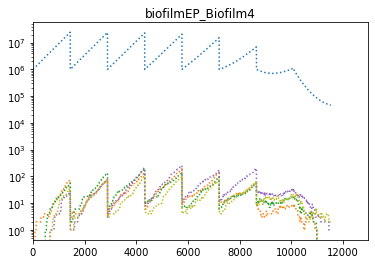

finished in  14.44499397277832
all saved as EP_Biofilm4
running simulation no: 5
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


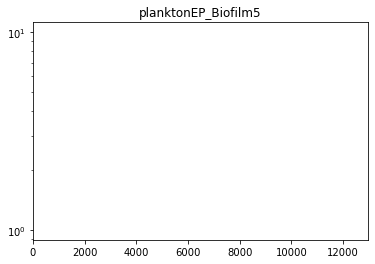

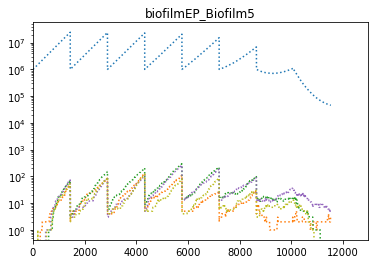

finished in  14.778395175933838
all saved as EP_Biofilm5
running simulation no: 6
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


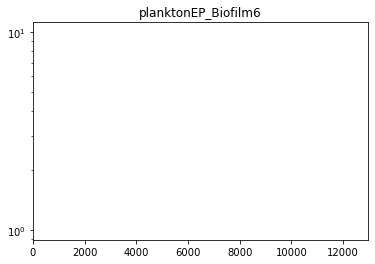

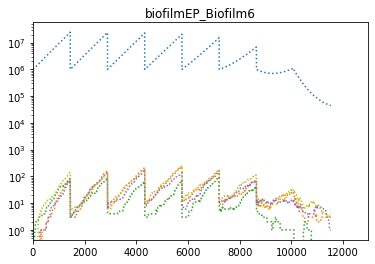

finished in  968.6047186851501
all saved as EP_Biofilm6
running simulation no: 7
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


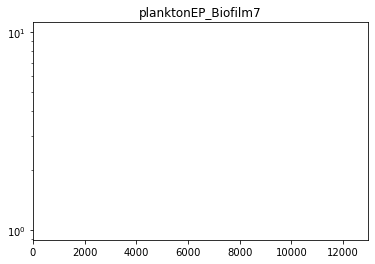

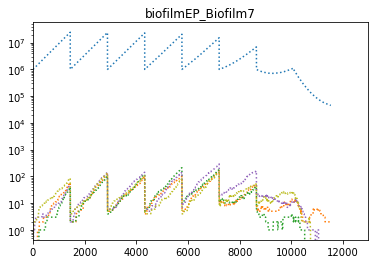

finished in  16.087239980697632
all saved as EP_Biofilm7
running simulation no: 8
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


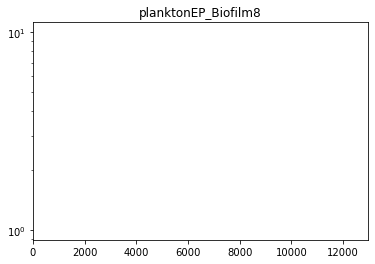

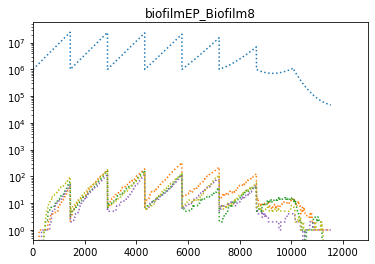

finished in  15.156796932220459
all saved as EP_Biofilm8
running simulation no: 9
starting
adhesion 0 release 0
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [11. 12. 12. 14. 12. 14. 14. 18. 12. 14. 14. 18. 14. 18. 18. 26.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


/Users/barbora/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


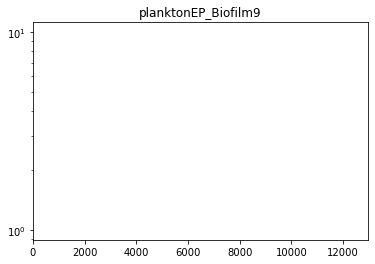

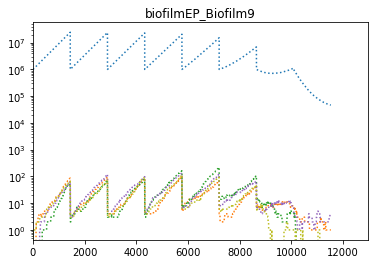

finished in  15.32285475730896
all saved as EP_Biofilm9


In [14]:
biofilm_benefit=10 # CHANGE THIS FOR VARIOUS SCENARIOS
biofilm_cost=0.9    # CHANGE THIS FOR VARIOUS SCENARIOS
name='EP_Biofilm' # CHANGE THIS FOR VARIOUS SCENARIOS

for i in range (R):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=passage_experiment(name=name+str(i), concentration_gradient=[0,0.5, 1, 2,4,8,16,32], biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost)
    np.savetxt(name+str(i)+'_time.txt', time_r)
    np.savetxt(name+str(i)+'_conc.txt', conc_r)

## Plotting the results: 

In [15]:
def generate_genotypes(k):  # this function generates 2^k phenotypes
    All = np.empty([0, k])
    for seq in itertools.product("01", repeat=k):
        s = np.array(seq)
        s = list(map(int, s))
        All = np.vstack([All, s])
    return All


def get_mean_mut_num(name='', N=1, color='b', k=1):
    fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

    gens=generate_genotypes(k)
    sum_mut=np.sum(gens,1)
    mut_weights=sum_mut
    for i in range (8):
            plt.axvline(x=12+i*24, color='green', linestyle='-', linewidth=21.5, alpha=0.1*i)

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        
        pop=np.loadtxt(loadname+'_pla_pop.txt')
        weighted_pops=pop*mut_weights
        mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
        a=np.sum(weighted_pops,1)
        b=np.sum(pop,1)
        mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)
        if mean_mut.any()<0:
            print ('negative', a,b)
        plt.plot(this_time, mean_mut,'red', linewidth=2, alpha=0.05)
        plt.xlim(0,8*24)
        plt.ylim(0,4.5)
        #print (mean_mut)
    plt.savefig(name+'MutNumPla.png', dpi=200,bbox_inches='tight')
    plt.show()
    
    fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
    ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])
    for i in range (8):
            plt.axvline(x=12+i*24, color='green', linestyle='-', linewidth=21.5, alpha=0.1*i)

    for i in range (N):
        loadname=name+str(i)
        this_time=np.loadtxt(loadname+'_time.txt')
        this_time=this_time/60
        
        pop=np.loadtxt(loadname+'_bio_pop.txt')
        weighted_pops=pop*mut_weights
        mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
        a=np.sum(weighted_pops,1)
        b=np.sum(pop,1)
        mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)
        if mean_mut.any()<0:
            print ('negative', a,b)
        plt.plot(this_time, mean_mut,'blue', linewidth=2, alpha=0.05)
        plt.xlim(0,8*24)
        #plt.ylim(0,4.5)
        #print (mean_mut)
   
    

    plt.xlabel('time [h]', fontsize=12)
    plt.ylabel('number of mutations', fontsize=12)
    plt.savefig(name+'MutNumBio.png', dpi=200,bbox_inches='tight')
    plt.show()
    
    print ('done')
    return (mean_mut, pop)

<ipython-input-17-8e878479abd4>:20: RuntimeWarning: invalid value encountered in true_divide
  mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
<ipython-input-17-8e878479abd4>:23: RuntimeWarning: invalid value encountered in true_divide
  mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)
<ipython-input-17-8e878479abd4>:20: RuntimeWarning: invalid value encountered in true_divide
  mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
<ipython-input-17-8e878479abd4>:23: RuntimeWarning: invalid value encountered in true_divide
  mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)
<ipython-input-17-8e878479abd4>:20: RuntimeWarning: invalid value encountered in true_divide
  mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
<ipython-input-17-8e878479abd4>:23: RuntimeWarning: invalid value encountered in true_divide
  mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)


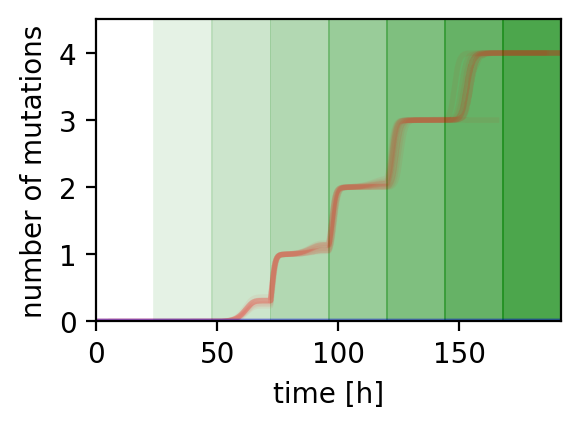

In [17]:
R=10
name1='EP_Plankton'
name2='EP_Biofilm'
fig1, ax1 = plt.subplots(dpi=200, figsize=(3, 2))
ax1.set_prop_cycle('color', [plt.cm.jet(i) for i in np.linspace(0, 1, 2**4)])

k=4
gens=generate_genotypes(k)
sum_mut=np.sum(gens,1)
mut_weights=sum_mut
for i in range (8):
        plt.axvline(x=12+i*24, color='green', linestyle='-', linewidth=21.5, alpha=0.1*i)

for i in range (R):
    loadname=name1+str(i)
    this_time=np.loadtxt(loadname+'_time.txt')
    this_time=this_time/60
    pop=np.loadtxt(loadname+'_bio_pop.txt')
    weighted_pops=pop*mut_weights
    mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
    a=np.sum(weighted_pops,1)
    b=np.sum(pop,1)
    mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)

    plt.plot(this_time, mean_mut,'red', linewidth=2, alpha=0.05)
    plt.xlim(0,8*24)
    plt.ylim(0,4.5)

for i in range (R):
    loadname=name2+str(i)
    this_time=np.loadtxt(loadname+'_time.txt')
    this_time=this_time/60
    pop=np.loadtxt(loadname+'_bio_pop.txt')
    weighted_pops=pop*mut_weights
    mean_mut2=np.sum(weighted_pops,1)/np.sum(pop,1)
    a=np.sum(weighted_pops,1)
    b=np.sum(pop,1)
    mean_mut=a/b#(a,b, out=np.zeros_like(a), where=b!=0)

    plt.plot(this_time, mean_mut,'blue', linewidth=2, alpha=0.05)
    plt.xlim(0,8*24)
    plt.ylim(0,4.5)

plt.xlabel('time [h]', fontsize=10)
plt.ylabel('number of mutations', fontsize=10)
plt.savefig('MutNumBio.png', dpi=200,bbox_inches='tight')
plt.show()
